<h1 style="font-size:40px;"><center>Classification with Pokemon Data</center></h1>
<img src="https://www.seekpng.com/png/detail/1-15149_pokemon-logo-png-pokemon-go-logo-png.png"/>

This notebook will continue with the theme of exploring Pokemon Data, this dataset consists of the Pokemon name, type, generation, battle statistics etc. Once we've explored the data we will then look to model the data and apply a classification algorithm on the data in which we will be predicting the "Legendary" status of each Pokemon in our dataset.

<h2>K-Nearest neighbours (KNN) classification</h2>

The model/algorithm we will be using is the K-Nearest neighbours (KNN) classification algorithm. The KNN algorithm is both interpretable and fast for small and medium datasets, it is a supervised method adnd doesn't use any specific assumption of the distribution of the data. The logic behind KNN is fairly simple, it compares a new observation to the <b>K</b> most similar instances. It can be defined as a distance metric between two data points. 

Steps to perform KNN algorithm:
<ol>
    <li>Pick a value for K.</li>
    <li>Search for the <b>K</b> observations in the training data that are the "nearest" measurements of the unknown Pokemon</li>
    <li> Use the most popular response value from the K nearest neighbours as the predicted response value for the unknown iris</li>

</ol>

In [39]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

%matplotlib inline

<h2>Loading in Data</h2>

In [3]:
#read the data into dataframe
df = pd.read_csv('Pokemon.csv')

In [4]:
#Display first five rows of the data
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
#Diplay the last five rows
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [6]:
#Shape of the data
df.shape

(800, 13)

In [7]:
#prints a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [8]:
#Descriptive statistics of the dataframe
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [9]:
#Check for null values
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [10]:
#Check for the number of duplicates
df.duplicated().sum()

0

In [11]:
#Number of unique values in each column of the Pokemon dataset
df.nunique()

#             721
Name          800
Type 1         18
Type 2         18
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

<h2>Feature Selection/Preprocessing</h2>

In [12]:
#Show the columns in the dataset
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [13]:
#Show how many of each class is in our dataset
df['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

For this we will select some of the numeric columns as the feature set, X:

In [14]:
X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

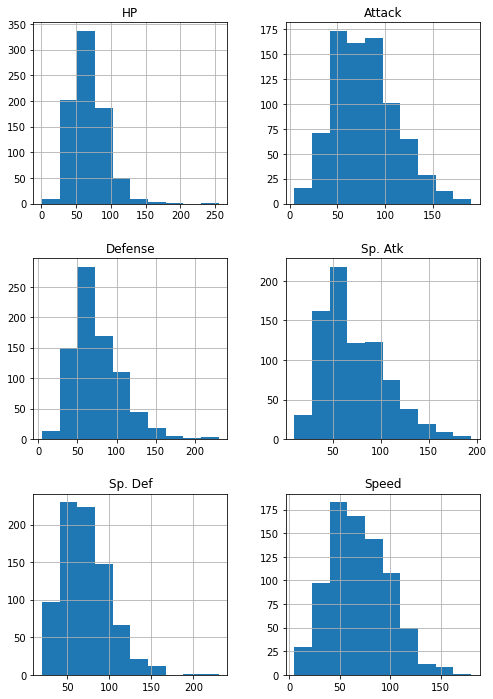

In [15]:
#Show the distribution of data using a histgram for each of the features
X.hist(figsize=(8,12))
plt.show()

In [16]:
#Creates a numpy array as this will help us with using scikit-learn library
X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].values

In [17]:
X[0:5]

array([[ 45,  49,  49,  65,  65,  45],
       [ 60,  62,  63,  80,  80,  60],
       [ 80,  82,  83, 100, 100,  80],
       [ 80, 100, 123, 122, 120,  80],
       [ 39,  52,  43,  60,  50,  65]])

Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

In [18]:
#Normalizing the data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.95062622, -0.92490618, -0.79715364, -0.2391303 , -0.24818854,
        -0.80150318],
       [-0.3628221 , -0.5241302 , -0.34791742,  0.21955954,  0.29115635,
        -0.28501525],
       [ 0.42091674,  0.09244823,  0.29384863,  0.83114599,  1.01028289,
         0.40363531],
       [ 0.42091674,  0.64736882,  1.57738071,  1.50389108,  1.72940942,
         0.40363531],
       [-1.18574787, -0.83241942, -0.98968346, -0.39202691, -0.78753344,
        -0.11285261]])

As the Legendary column is not numeric column, we will be using the Label Encoding to encode my Legendary column

In [19]:
#Label Encoder
le = LabelEncoder()

y = le.fit_transform(df['Legendary'])

<h2>Modelling</h2>

In [20]:
#Check that both X and Y have the relevant size/shape
print(X.shape)
print(y.shape)

(800, 6)
(800,)


In [21]:
#Train, Test and Split methododology is an evaluation approach in which you make fit the training data, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Training Set: ", X_train.shape, y_train.shape)
print("Testing Set: ", X_test.shape, y_test.shape)

Training Set:  (640, 6) (640,)
Testing Set:  (160, 6) (160,)


In [22]:
#Create the model with k = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn

KNeighborsClassifier(n_neighbors=1)

In [23]:
#Fit the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
#Predict the response using testing data
yhat = knn.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

<h2>Evaluation</h2>

KNN model has predicted that the first five rows are not "Legendary" Pokemon

In [25]:
#Evaluation of the model
print('Train Set Accuracy: ', metrics.accuracy_score(y_train, knn.predict(X_train)))
print('Test Set Accuracy:  ', metrics.accuracy_score(y_test, yhat))

Train Set Accuracy:  0.9953125
Test Set Accuracy:   0.9375


K is the number of nearest neighbors to examine.

We can check how the KNN model scores when changing the value of K:

In [26]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    
    #Train model and predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1] = np.std(yhat==y_test) / np.sqrt(yhat.shape[0])
    
    
mean_acc
    

array([0.9375 , 0.95   , 0.9375 , 0.95625, 0.94375, 0.94375, 0.9375 ,
       0.94375, 0.9375 ])

In [41]:
print('The F Score: ', f1_score(y_test, yhat))

The F Score:  0.5


In [38]:
#Displays the Confusion Matrix 
cm = confusion_matrix(y_test, yhat)
cm

array([[145,   3],
       [  7,   5]])

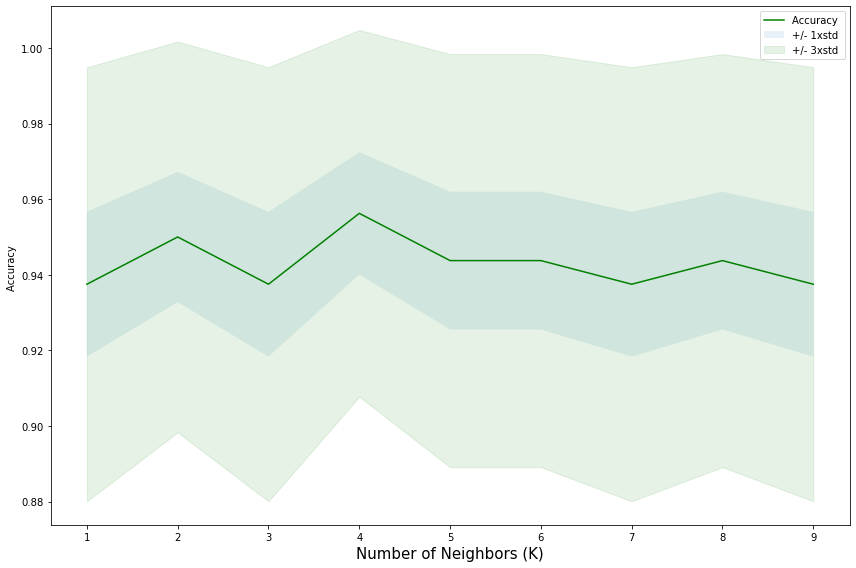

In [30]:
#Plotting the model accuracy for a different number of neighbours
plt.figure(figsize=(12,8))
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ', fontsize=14)
plt.xlabel('Number of Neighbors (K)', fontsize=14)
plt.tight_layout()
plt.show()

From the above plot the number of K that is optimal and produces the best score for prediction on the Legendary status of the Pokemon in the dataset is <b>4</b>.

<h2>Conclusion</h2>

In conclusion the KNN model has showed that a very high accuracy score <b>0.95625</b> predicting the Legendary status of Pokemon, whilst also showing the optimal number for K is <b>4</b>. However with KNN there is limited value given for interpretation as it does not identify any meaningful trends or estimate the relationship between the target value and particular features. In addition the algorithm cannot ignore features or treat them as less important. An additional algorithm may need to be used to extract the importance of each feature in the model.